<a href="https://colab.research.google.com/github/grace12021/Simulation-Using-Python/blob/master/Vu14/Vu14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulation of Vu14
## Requirements
In this implementation, the following libraries are required
* numpy
* matplotlib
* scikit-learn

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Basic Setting
The following is the basic setting for quick visualization.

In [ ]:
'''
n: num_nodes
k: num_clusters
probs: probabilies of edge between nodes of clusters
'''
n = 500
k = 4
probs = np.array([[0.8,0.2,0.2,0.2],
                  [0.2,0.8,0.2,0.2],
                  [0.2,0.2,0.8,0.2],
                  [0.2,0.2,0.2,0.8]])

## Models of Graphs


### Block Stochastic Model

In [ ]:
class BlockStochasticGraph:
  '''
  Class for generating random graphs using block stochastic model
  '''
  def __init__(self, num_nodes, num_clusters, probs):
    '''
    Args:
      num_nodes: int, number of nodes in graph
      num_clusters: int, number of clusters in stochastic block model
      probs: numpy array of size (num_clusters, num_clusters),
             probs[i][j] = probability of edge between nodes of cluster i,j
             We should have probs[i][j] == probs[j][i]
    '''
    self.node_to_cluster = np.random.choice(num_clusters, num_nodes)
    self.adj_matrix = np.zeros([num_nodes, num_nodes])
    for m in range(num_nodes):
      for n in range(num_nodes):
        self.adj_matrix[m][n] = int(
            probs[self.node_to_cluster[m]][self.node_to_cluster[n]]>np.random.uniform(0,1)
            ) * int(m != n)

### Symmetric Block Stochastic Model

In [ ]:
class SymmetricBlockStochasticGraph:
  '''
  Class for generating random graphs using block stochastic model
  '''
  def __init__(self, num_nodes, num_clusters, p, q):
    '''
    Args:
      num_nodes: int, number of nodes in graph
      num_clusters: int, number of clusters in stochastic block model
      p: float, probability of edge between nodes in a cluster
      q: float, probability of edge between nodes in different clusters
      We may assume that p >> q
    '''
    self.node_to_cluster = np.random.choice(num_clusters, num_nodes)
    self.adj_matrix = np.zeros([num_nodes, num_nodes])
    for m in range(num_nodes):
      for n in range(num_nodes):
        if m!=n and self.nodes_to_cluster[m] == self.nodes_to_cluster[n]:
          self.adj_matrix[m][n] = p
        else:
          self.adj_matrix[m][n] = q

## Algorithms

### Algorithm of Mc Sherry
1. Algorithm 1: Combinatorial Projection
2. Algorithm 2: Mc Sherry's Algorithm

### Vu 14
Algorithm using SVD.

1. Algorithm 3: SVD I

In [ ]:
def svd1(adj_matrix, num_clusters):
  '''
  Args:
    adj_matrix: numpy array of size (num_nodes, num_nodes),
    num_clusters: int, number of clusters
  Returns:
    numpy array of size (num_nodes, num_clusters) where each row is
    the projection of each point representing a node. There is a change of basis
    to the orthonormal basis formed by the SVD vectors.  
  '''
  #Yt(YYt)Y
  P, _, _ = np.linalg.svd(adj_matrix, compute_uv=True, hermitian=True)
  subspace_basis = P[:,:num_clusters] # the columns are the basis
  row_matrix = (np.matmul(subspace_basis.T, adj_matrix)).transpose()
  # row_matrix = ()
  return row_matrix

2. Algorithm 4: SVD II

In [ ]:
def svd2(adj_matrix, num_clusters):
  '''
  Args:
    adj_matrix: numpy array of size (num_nodes, num_nodes),
    num_clusters: int, number of clusters
  Returns:
    numpy array of size (num_nodes, num_clusters) where each row is
    the projection of each point representing a node. There is a change of basis
    to the orthonormal basis formed by the SVD vectors.  
  '''
  num_nodes = adj_matrix.shape[0]
  B = adj_matrix.copy()
  Y = np.random.choice(4, num_nodes) # 0: Y1, 1: Z, 2: Y2, 3: Z 
  # remove edges within Y and within Z
  for m in range(num_nodes):
    for n in range(num_nodes):
      if Y[m]%2 == Y[n]%2: 
        B[m][n] = 0
  idx_y1 = np.argwhere(Y == 0).squeeze()
  idx_y2 = np.argwhere(Y == 2).squeeze()
  A_hat = B[:,idx_y1]

  singular_vectors, _, _ = np.linalg.svd(A_hat, compute_uv=True, hermitian=False)
  A_hat_k = singular_vectors[:, :num_clusters]
  row_matrix = (np.matmul(A_hat_k.T, B[:,idx_y2])).transpose()
  '''
  idx1 = np.argwhere(Y1 != 0)
  idx2 = np.argwhere(Y1 != 1)
  idx3 = np.argwhere(Y1 != 2)
  idx4 = np.argwhere(Y1 != 3)
  B1 = np.delete(B, idx1, axis=1)
  B2 = np.delete(B, idx2, axis=1)
  B3 = np.delete(B, idx3, axis=1)
  B4 = np.delete(B, idx4, axis=1)
  A1, _, _ = np.linalg.svd(B1, compute_uv=True, hermitian=False)
  A2, _, _ = np.linalg.svd(B2, compute_uv=True, hermitian=False)
  A3, _, _ = np.linalg.svd(B3, compute_uv=True, hermitian=False)
  A4, _, _ = np.linalg.svd(B4, compute_uv=True, hermitian=False)
  A_k1 = A[:,:num_clusters] # the columns are the basis
  row_matrix = (np.matmul(subspace_basis.T, adj_matrix)).transpose()
  '''
  return row_matrix

In [ ]:
projs_svd2 = svd2(graph.adj_matrix, 4)

In [ ]:
import random
print(random.sample(range(1,46), k=6))

[27, 19, 17, 28, 34, 8]


In [ ]:
a = np.random.uniform(3,5, (3,5))
print(a)
b = np.random.choice(2, 5)
print(b)
idx = np.argwhere(b == 0)
a1 = np.delete(a, idx, axis=1)
print(idx)
print(a1)

[[3.25566352 4.70307772 4.19471027 3.57117658 3.78969016]
 [3.53904109 3.01262513 4.62250276 4.54300921 3.06102424]
 [3.37747156 4.57399295 4.56036855 4.72621198 4.97405775]]
[0 1 0 0 1]
[[0]
 [2]
 [3]]
[[4.70307772 3.78969016]
 [3.01262513 3.06102424]
 [4.57399295 4.97405775]]


In [ ]:
import numpy as np
a = np.random.uniform(3,5, (3,5))
print(a)
a[:][1] = 1.0
print(a)
b = np.random.choice(2, 5)
b = b-0.0
print(b)
print(a*b)


[[4.89300899 4.98156988 4.12228659 4.7255264  3.60293011]
 [3.06494166 4.83069309 4.77383697 3.2906929  3.56426589]
 [3.16579283 3.45113106 4.67180304 3.09214877 3.88750324]]
[[4.89300899 4.98156988 4.12228659 4.7255264  3.60293011]
 [1.         1.         1.         1.         1.        ]
 [3.16579283 3.45113106 4.67180304 3.09214877 3.88750324]]
[0. 1. 0. 0. 0.]
[[0.         4.98156988 0.         0.         0.        ]
 [0.         1.         0.         0.         0.        ]
 [0.         3.45113106 0.         0.         0.        ]]


## Visualization

In [ ]:
graph = BlockStochasticGraph(n, k, probs)

In [ ]:
print(graph.adj_matrix)
print(graph.adj_matrix.shape[0])

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 1.]
 ...
 [0. 1. 0. ... 0. 1. 1.]
 [1. 0. 0. ... 1. 0. 1.]
 [1. 0. 1. ... 0. 1. 0.]]
500


In [ ]:
print(graph.node_to_cluster)

[2 1 2 2 0 3 1 2 1 0 0 1 3 1 1 0 1 0 1 3 1 1 0 0 0 3 1 2 1 3 3 0 3 0 0 2 0
 3 2 1 2 0 1 1 2 3 0 1 3 2 1 0 3 3 0 0 0 1 2 3 1 2 1 1 3 2 2 1 3 3 2 1 3 1
 3 0 1 2 1 0 3 3 0 0 3 3 0 0 3 0 3 0 0 0 0 1 3 1 3 0 2 2 3 1 0 3 3 0 0 0 3
 2 0 1 2 0 1 1 1 1 1 2 2 1 2 1 1 2 2 2 3 0 0 2 2 3 3 2 3 1 2 1 2 3 3 0 1 3
 2 0 0 2 1 2 2 1 1 3 1 0 3 2 2 1 1 3 1 3 3 1 1 1 1 2 2 0 1 1 2 3 1 2 2 2 2
 2 3 0 2 1 2 2 2 1 0 0 0 1 0 1 1 3 1 0 0 1 2 0 2 1 2 0 3 3 0 3 0 2 1 0 3 3
 1 0 0 0 1 2 1 0 1 1 3 2 2 1 0 0 0 2 0 1 1 3 0 2 3 2 3 1 3 0 0 3 0 0 2 2 3
 0 1 1 0 2 3 1 1 3 2 1 1 0 1 0 0 3 2 2 2 1 3 2 3 0 1 0 0 2 1 3 2 3 1 3 2 2
 3 1 3 2 2 0 2 3 1 1 0 1 1 2 3 0 1 0 2 3 3 0 2 2 3 2 1 1 3 0 0 2 0 0 2 2 3
 3 1 1 1 2 2 0 0 1 3 2 1 2 0 0 3 3 0 0 0 1 0 1 2 2 2 2 0 2 2 0 2 3 2 1 0 1
 1 0 1 2 2 2 3 0 1 3 2 3 3 3 0 3 2 1 3 3 1 1 2 2 1 0 0 3 3 0 3 1 1 1 3 2 1
 3 1 1 3 2 1 3 2 3 3 0 3 0 2 3 1 2 1 1 2 1 2 2 3 0 0 0 0 2 1 1 1 2 1 1 0 1
 2 0 2 0 1 1 3 3 3 2 3 2 2 1 1 1 2 2 0 2 0 3 0 2 3 3 0 2 3 3 1 1 2 1 0 3 0
 2 3 0 1 1 1 1 0 2 0 0 1 

In [ ]:
projs = svd1(graph.adj_matrix, 4)

In [ ]:
projs

array([[-8.21996988,  3.1004511 , -4.58968466,  1.89293167],
       [-8.42164923, -5.23232506,  0.28121902,  0.04575002],
       [-7.55737352,  3.04435932, -5.50897379,  1.26788286],
       ...,
       [-7.60208538,  2.91697612,  4.35101632,  2.72832884],
       [-8.06609518,  2.63497226,  4.23720937,  2.42353677],
       [-7.81277574,  2.27275024, -4.22621477,  2.11233073]])

In [ ]:
def is_perfect(clusters, embeddings):
  result = True
  

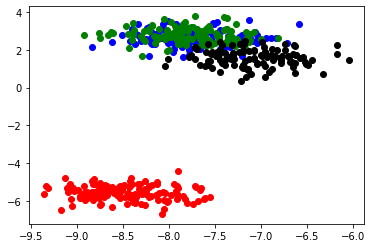

In [ ]:
plt.scatter(projs[graph.node_to_cluster==0,0],
            projs[graph.node_to_cluster==0,1], color="blue")
plt.scatter(projs[graph.node_to_cluster==1,0],
            projs[graph.node_to_cluster==1,1], color="red")
plt.scatter(projs[graph.node_to_cluster==2,0],
            projs[graph.node_to_cluster==2,1], color="green")
plt.scatter(projs[graph.node_to_cluster==3,0],
            projs[graph.node_to_cluster==3,1], color="black")

plt.show()

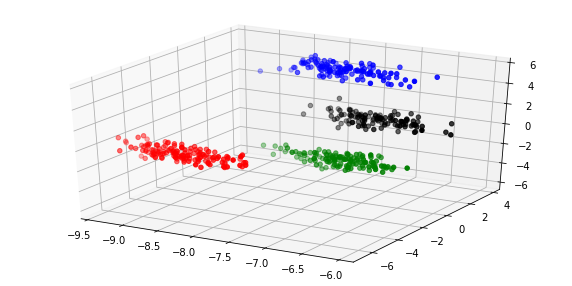

In [ ]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(projs[graph.node_to_cluster==1,0], projs[graph.node_to_cluster==1,1],
           projs[graph.node_to_cluster==1,2],color="red")
ax.scatter(projs[graph.node_to_cluster==0,0], projs[graph.node_to_cluster==0,1],
           projs[graph.node_to_cluster==0,2],color="blue")
ax.scatter(projs[graph.node_to_cluster==2,0], projs[graph.node_to_cluster==2,1],
           projs[graph.node_to_cluster==2,2],color="green")
ax.scatter(projs[graph.node_to_cluster==3,0], projs[graph.node_to_cluster==3,1],
           projs[graph.node_to_cluster==3,2],color="black")

plt.show()

In [ ]:
def visualize_representation()

SVD2


In [ ]:
projs_svd2 = svd2(graph.adj_matrix, 4)

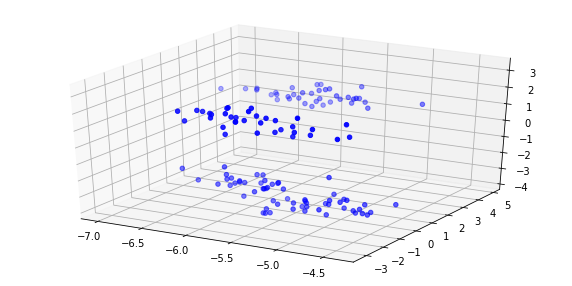

In [ ]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(projs_svd2[:,0],
            projs_svd2[:,1], projs_svd2[:,2], color="blue")

plt.show()